## Coming up with ways to reduce the absenteeism of employees given the Absenteeism At Work dataset:

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
#Reading the dataset
df = pd.read_csv("./data/Absenteeism_at_work.csv")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2


In [3]:
#Checking if any column contains null values as well as general info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ID                               740 non-null    int64 
 1   Reason for absence               740 non-null    int64 
 2   Month of absence                 740 non-null    int64 
 3   Day of the week                  740 non-null    int64 
 4   Seasons                          740 non-null    int64 
 5   Transportation expense           740 non-null    int64 
 6   Distance from Residence to Work  740 non-null    int64 
 7   Service time                     740 non-null    int64 
 8   Age                              740 non-null    int64 
 9   Work load Average/day            740 non-null    object
 10  Hit target                       740 non-null    int64 
 11  Disciplinary failure             740 non-null    int64 
 12  Education                        740

In [4]:
#Checking the column names to check for errors
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [5]:
#fixing the trailing whitespace in 'Work load Average/day ' as well as whitespace between words
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['id', 'reason_for_absence', 'month_of_absence', 'day_of_the_week',
       'seasons', 'transportation_expense', 'distance_from_residence_to_work',
       'service_time', 'age', 'work_load_average/day', 'hit_target',
       'disciplinary_failure', 'education', 'son', 'social_drinker',
       'social_smoker', 'pet', 'weight', 'height', 'body_mass_index',
       'absenteeism_time_in_hours'],
      dtype='object')

In [6]:
# The 'work_load_average/day' column appears to be numerical however it is actually a string and cannot be used while 
# performing EDA effectively. Hence converting the column values to numeric form
df[['work_load_average/day']] = df[['work_load_average/day']].replace(",", '', regex=True)
df[['work_load_average/day']] = df[['work_load_average/day']].apply(pd.to_numeric)

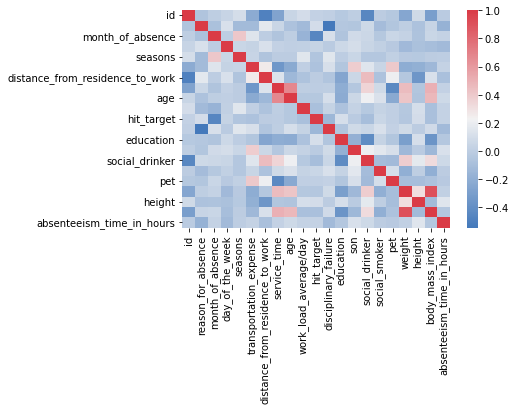

In [7]:
# Getting and vizualizing correlation matrix
corr_matrix = df.corr()

cmap_set = sns.diverging_palette(250, 10, as_cmap=True)

figure = sns.heatmap(corr_matrix, cmap=cmap_set)

In [8]:
# Creating a mapping for yes/no values
yes_no_mapping = {0:'no', 1:'yes'}

In [9]:
# creating a copy of the dataset and modifying the copy for EDA
df_eda = df.drop(columns=['id']).copy()
df_eda.disciplinary_failure = df_eda.disciplinary_failure.map(yes_no_mapping)
df_eda.social_drinker = df_eda.social_drinker.map(yes_no_mapping)
df_eda.social_smoker = df_eda.social_smoker.map(yes_no_mapping)

is_disease = df_eda['reason_for_absence'].apply(lambda x:'yes' if x > 0 and x <= 21 else 'no')
df_eda.insert(column='is_disease', value=is_disease, loc=1)

df_eda.drop(df_eda[df_eda['month_of_absence'] == 0].index , inplace=True)

In [10]:
df_eda.head(10)

,reason_for_absence,is_disease,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,disciplinary_failure,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours
0,26,no,7,3,1,289,36,13,33,239554,...,no,1,2,yes,no,1,90,172,30,4
1,0,no,7,3,1,118,13,18,50,239554,...,yes,1,1,yes,no,0,98,178,31,0
2,23,no,7,4,1,179,51,18,38,239554,...,no,1,0,yes,no,0,89,170,31,2
3,7,yes,7,5,1,279,5,14,39,239554,...,no,1,2,yes,yes,0,68,168,24,4
4,23,no,7,5,1,289,36,13,33,239554,...,no,1,2,yes,no,1,90,172,30,2
5,23,no,7,6,1,179,51,18,38,239554,...,no,1,0,yes,no,0,89,170,31,2
6,22,no,7,6,1,361,52,3,28,239554,...,no,1,1,yes,no,4,80,172,27,8
7,23,no,7,6,1,260,50,11,36,239554,...,no,1,4,yes,no,0,65,168,23,4
8,19,yes,7,2,1,155,12,14,34,239554,...,no,1,2,yes,no,0,95,196,25,40
9,22,no,7,2,1,235,11,14,37,239554,...,no,3,1,no,no,1,88,172,29,8


In [11]:
# Getting general numerical analysis of the data
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
reason_for_absence,737.0,19.294437,8.360679,0.0,13.0,23.0,26.0,28.0
month_of_absence,737.0,6.350068,3.419430,1.0,3.0,6.0,9.0,12.0
day_of_the_week,737.0,3.913161,1.422090,2.0,3.0,4.0,5.0,6.0
seasons,737.0,2.546811,1.112329,1.0,2.0,3.0,4.0,4.0
transportation_expense,737.0,221.514247,66.960952,118.0,179.0,225.0,260.0,388.0
distance_from_residence_to_work,737.0,29.624152,14.843701,5.0,16.0,26.0,50.0,52.0
service_time,737.0,12.549525,4.393121,1.0,9.0,13.0,16.0,29.0
age,737.0,36.419267,6.461156,27.0,31.0,37.0,40.0,58.0
work_load_average/day,737.0,271491.339213,39137.633529,205917.0,244387.0,264249.0,294217.0,378884.0
hit_target,737.0,94.586160,3.786916,81.0,93.0,95.0,97.0,100.0


## We start with analyzing univariate relationships

<AxesSubplot:xlabel='reason_for_absence', ylabel='count'>

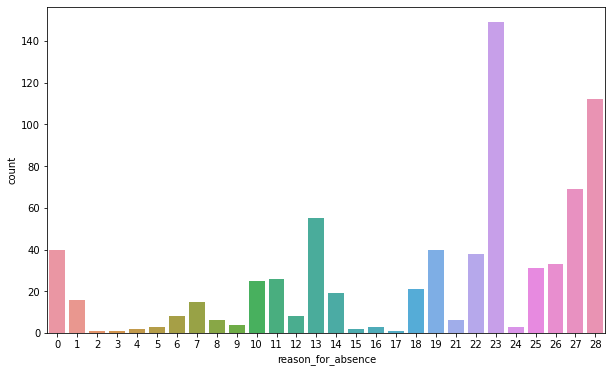

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='reason_for_absence', data=df_eda)

### Exaplanation:
As we can see from the above plot, the highest count among the reasons is of reason 23 (medical consultation) followed by reason 28 (dental consultation). The third highest count is of reason 27(physiotherapy)

<AxesSubplot:xlabel='month_of_absence', ylabel='count'>

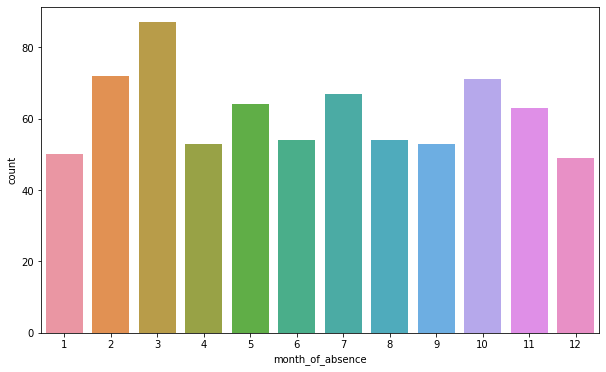

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_eda, x='month_of_absence')

In [14]:
df_eda.month_of_absence.value_counts(normalize=True)

3     0.118046
2     0.097693
10    0.096336
7     0.090909
5     0.086839
11    0.085482
8     0.073270
6     0.073270
9     0.071913
4     0.071913
1     0.067843
12    0.066486
Name: month_of_absence, dtype: float64

### Explanation:
The most absences are seen during March, followed closely by February and October. December has the lowest percentage of absences recorded.

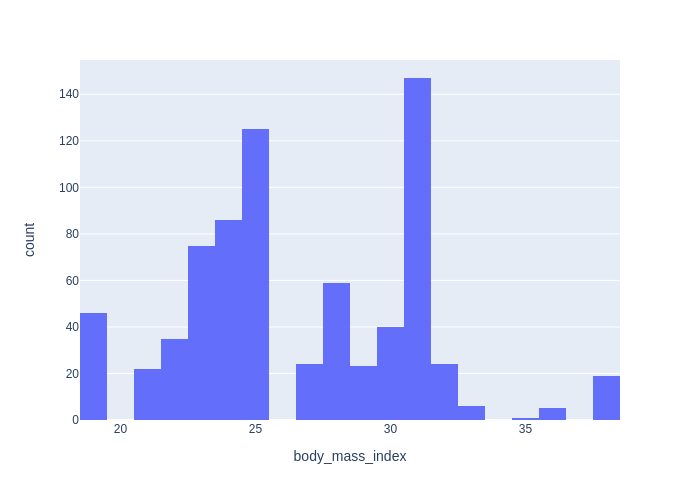

In [15]:
fig = px.histogram(df_eda, x='body_mass_index')
fig.show("png")

In [16]:
df_eda.body_mass_index.value_counts()

31    147
25    125
24     86
23     75
28     59
19     46
30     40
22     35
27     24
32     24
29     23
21     22
38     19
33      6
36      5
35      1
Name: body_mass_index, dtype: int64

### Explanation:
The plot appears to be bimodal and slightly right skewed. Highest number of absentees have a BMI of 31, which is categorized as obese, while coming closely behind are people having BMI of 25, which is categorized as overweight.

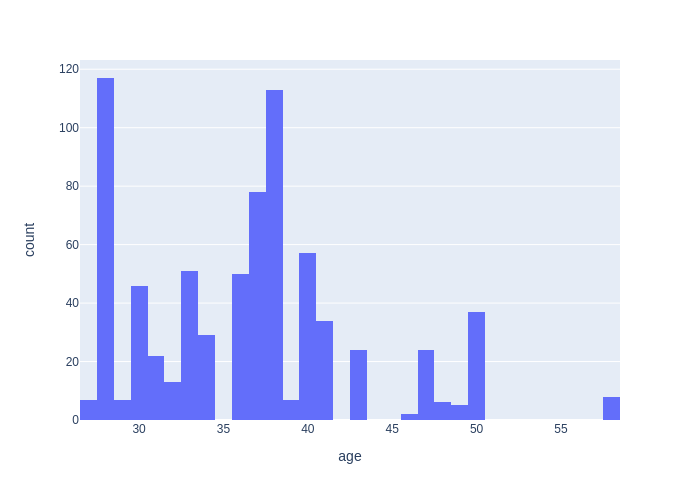

In [17]:
fig = px.histogram(df_eda, x='age')
fig.show("png")

In [18]:
df_eda.age.value_counts()

28    117
38    113
37     78
40     57
33     51
36     50
30     46
50     37
41     34
34     29
47     24
43     24
31     22
32     13
58      8
29      7
27      7
39      7
48      6
49      5
46      2
Name: age, dtype: int64

### Explanation:
We can see that the most common age of absentees is 28, followed closely by 38. The least common age for absentees is 46. Furthermore, the plot is right skewed and appears to be multimodal.

<AxesSubplot:xlabel='education', ylabel='count'>

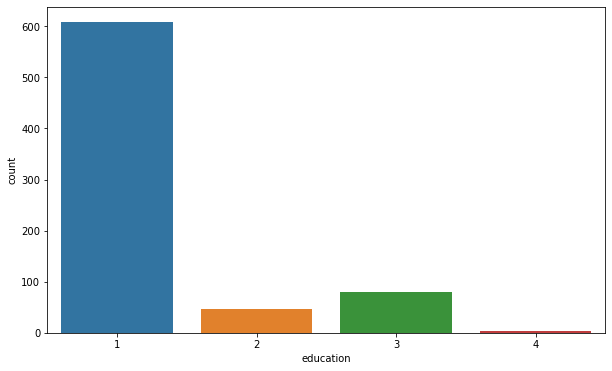

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_eda, x='education')

### Explanation:
We can see from the plot that a high number of absentees have 1 (High school) level education while a very less number of absentees have 4 (Master or PhD) level of education.

A reason for this skew may be that most textile employees would have more high school level education rather than higher educated employees.

<AxesSubplot:xlabel='son', ylabel='count'>

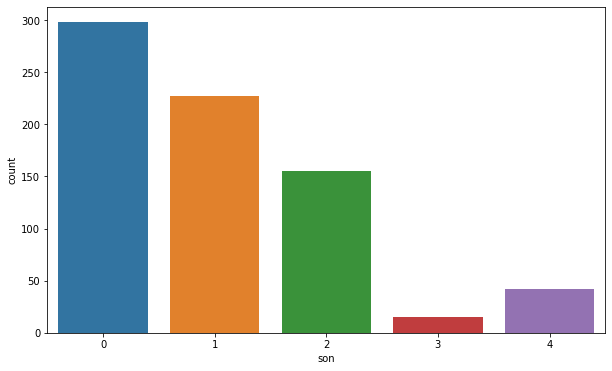

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_eda, x='son')

### Explanation:
The data is right skewed and has a natural boundary at 0.

We can see that the highest number of absentees have 0 children, followed by 1 and 2 children. The count takes a dip at 3 children before rising slightly at 4 children.

<AxesSubplot:xlabel='is_disease', ylabel='count'>

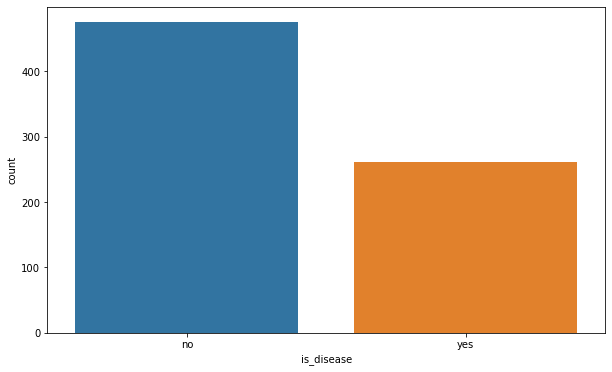

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_eda, x='is_disease')

In [22]:
df_eda.is_disease.value_counts(normalize=True)

no     0.644505
yes    0.355495
Name: is_disease, dtype: float64

### Explanation:
Only about 35% of the absences are due to the reasons listed in the ICD table. Whereas the absences for other reasons are almost twice in number.

<AxesSubplot:xlabel='social_smoker', ylabel='count'>

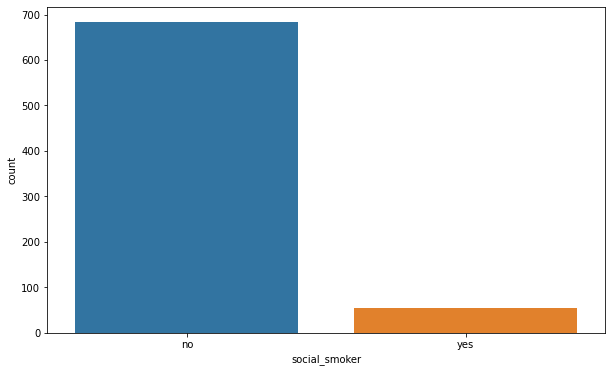

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_eda, x='social_smoker')

In [24]:
df_eda.social_smoker.value_counts(normalize=True)

no     0.92673
yes    0.07327
Name: social_smoker, dtype: float64

<AxesSubplot:xlabel='social_drinker', ylabel='count'>

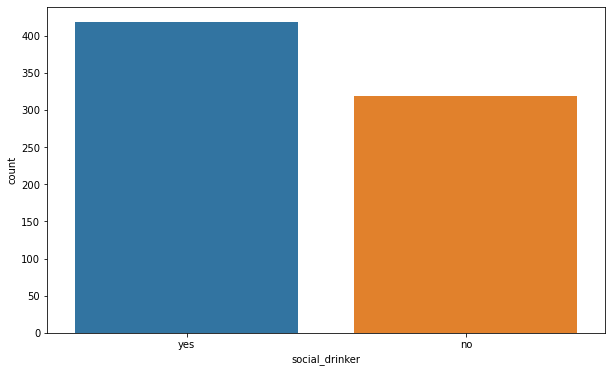

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_eda, x='social_drinker')

In [26]:
df_eda.social_drinker.value_counts(normalize=True)

yes    0.567164
no     0.432836
Name: social_drinker, dtype: float64

### Explanation:
We can see that while only about 7% of the absentees are social smokers about 56% of them are social drinkers

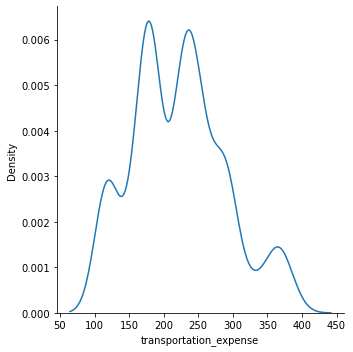

In [27]:
sns.displot(data=df_eda, x='transportation_expense', kind='kde')

### Explanation:
The data appears to be multi-modal and is slightly right skewed with the highest two peaks being at about 200 and 250 units

## We now analyze relationships with the target variable "absenteeism_time_in_hours"

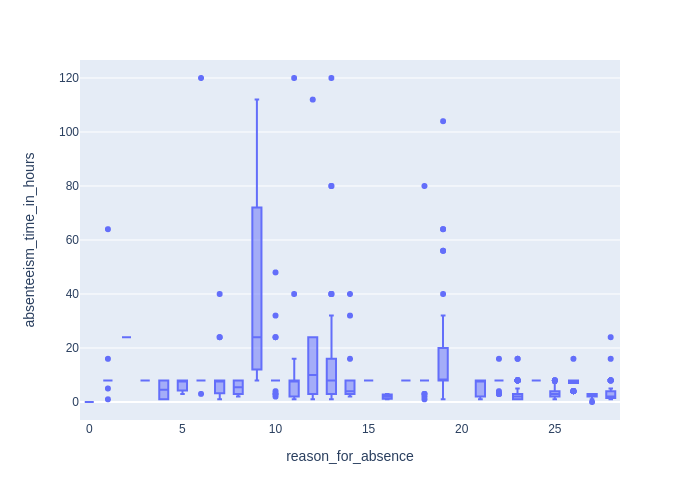

In [28]:
fig = px.box(df_eda, x='reason_for_absence', y='absenteeism_time_in_hours')
fig.show("png")

In [29]:
df_eda.groupby('reason_for_absence')['absenteeism_time_in_hours'].mean()

reason_for_absence
0      0.000000
1     11.375000
2     24.000000
3      8.000000
4      4.500000
5      6.333333
6     21.375000
7     10.000000
8      5.333333
9     42.000000
10    11.040000
11    11.423077
12    23.375000
13    15.309091
14     8.789474
15     8.000000
16     2.000000
17     8.000000
18    10.333333
19    18.225000
21     5.833333
22     7.710526
23     2.845638
24     8.000000
25     3.483871
26     7.272727
27     2.275362
28     2.991071
Name: absenteeism_time_in_hours, dtype: float64

### Explanation:
From the above plot and mean distribution, the mean as well as the median value for reason 9 seems to be the highest. Furthermore, overall, the mean and median values for reason numbers below 22 seem to be much higher than those for reason numbers of 22 and above. This can be further clarified from the below plot.

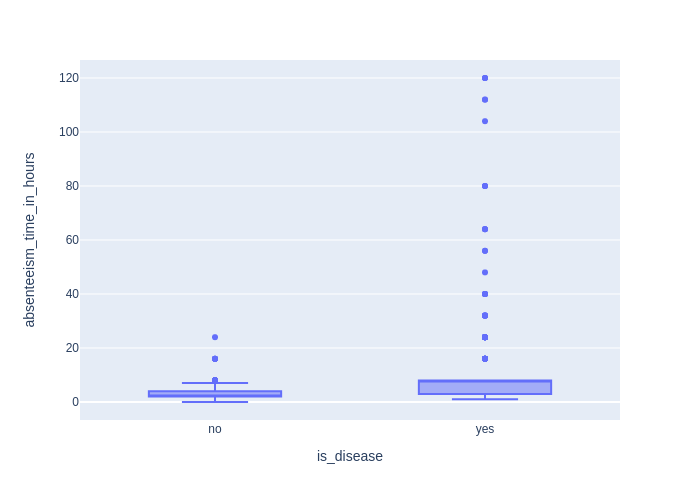

In [30]:
fig = px.box(df_eda, x='is_disease', y='absenteeism_time_in_hours')
fig.show("png")

In [31]:
df_eda.groupby('is_disease')['absenteeism_time_in_hours'].median()

is_disease
no     2.0
yes    8.0
Name: absenteeism_time_in_hours, dtype: float64

In [32]:
# performing t test for checking significant difference in absentee hours for people having an ICD reason and those without 
# an ICD reason
disease_true = df_eda[df_eda['is_disease'] == 'yes']['absenteeism_time_in_hours']
disease_false = df_eda[df_eda['is_disease'] == 'no']['absenteeism_time_in_hours']
test_results = stats.ttest_ind(disease_false, disease_true)
print(test_results)

Ttest_indResult(statistic=-10.65394388000172, pvalue=9.584009857537822e-25)


### Explanation: 
We see from the above plot that there is about 6 hours of difference in the median values of ICD recognized disease absentees. We also conducted a T test, and from the results, as the p-value is much smaller than 0.05, we can conclude there is indeed a difference in the mean values of the absentees with reasons recognized by the ICD and those not recognized by the ICD

This also shows that while we have a higher count of employees being absent for non ICD reasons, the absent number of hours for an employee is much greater on an average for ICD reasons.

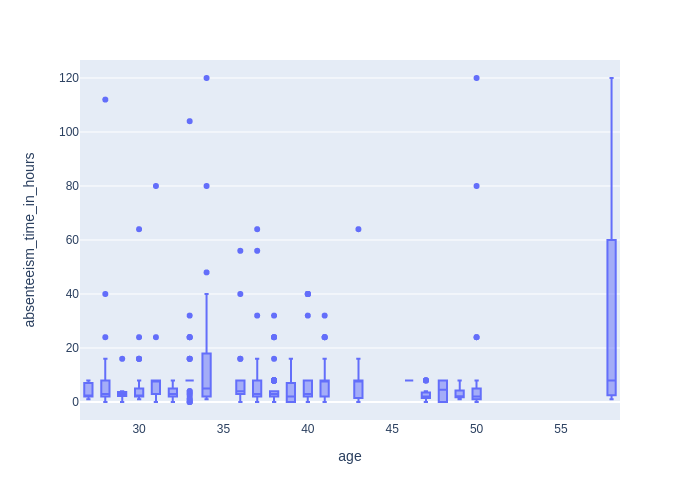

In [33]:
fig = px.box(df_eda, x='age', y='absenteeism_time_in_hours')
fig.show("png")

### Explanation: 
Here we see how the number of absentee hours vary for each age. The variance is highest for the age of 58 years. For other ages, there are a few changes but the median hours remain nearly the same for nearly all ages. We also observe comparatively more variance for the age of 34 years

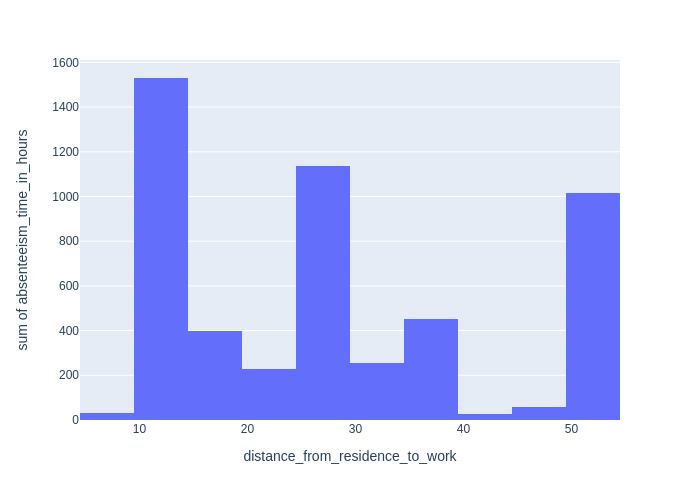

In [34]:
fig = px.histogram(df_eda, x='distance_from_residence_to_work', y='absenteeism_time_in_hours')
fig.show("png")

### Explanation:
We use the sum metric here as scatter plots and box plots become too crowded due to large number of integer values of 'distance_from_residence_to_work' feature. 

We can see the plot is right skewed with a natural barrier at 0 as distance cannot be negative. Furthermore, the sum for the absentee hours is highest for people in the 10-14 km clas, followed by 25-29 km class and 50-54 km class. 

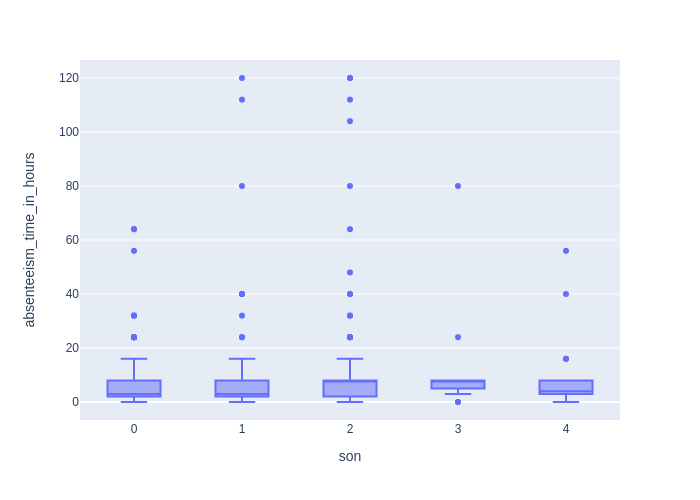

In [35]:
fig = px.box(df_eda, x='son', y='absenteeism_time_in_hours')
fig.show("png")

### Explanation:
We see that for 0 and 1 child, the median value is nearly the same, with 1 child absentees having slightly more outliers. For employees with 2 as well as 3 children, however, the median value increases to 8. It goes down to 4 again for employees with 4 children. 

We conduct a one way ANOVA test to check whether number of children affects the absentee hours in a significant manner.

In [36]:
formula = 'absenteeism_time_in_hours ~ C(son)'
data_son_ab_hours = df_eda[['absenteeism_time_in_hours', 'son']]

model = ols(formula, data=data_son_ab_hours).fit()

anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(son),4.0,3426.568189,856.642047,4.908095,0.000656
Residual,732.0,127760.769668,174.536571,NaN,NaN


### Explanation: 
Thus, from the above results, we conclude that atleast of the mean values grouped by the number of children is significantly different from another. In other words, the number of children of an employee does significantly affect the number of hours the employee is absent.

# Conclusion:

From the above analysis, we can come up with a few ways to reduce the absenteeism:

1. Even though the number of absentee hours are more for ICD recognized diseases, these are diseases for which absentees are very difficult to reduce. Furthermore, the count of absences are more for non ICD diseases, the most being in reason 23 (medical consultation), followed by dental consultation and physiotherapy. Such absences can also be caused due to having high BMI as seen from the BMI countplot. To reduce leaves for such reasons, the company can provide for medical checkups once every half year or once a year. The company can also have a medical consultant available so that the employees can have medical consultations and some amount of physiotherapy within the company itself. This can really help in reducing the number of absenteeism.


2. As seen from the 'absenteeism_time_in_hours' vs 'distance_from_residence_to_work', quite a few absentees are within the 10-14 and 25-29 km radius. The company can arrange a bus for them to commute so as to reduce the number of absentee employees that are absent due to the travel distance and issues that might arise while travelling. 


3. Employees who have greater than 2 sons could have a little amount of work shifted from them to those who have less than 2 kids. This would help the employees with more children, and also slightly increasing the workload would promote the employees with less kids to reduce the absence hours, as the absence count is the high for employees having less than 2 kids.